<h3 style='color:purple' align='center'>Random Forest Python Tutorial</h3>

**Digits dataset from sklearn**

In [192]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, mean_absolute_error 
from sklearn import preprocessing 
from sklearn.ensemble import RandomForestClassifier


In [193]:
df = pd.read_excel('mun.xlsx')
df=df.drop(['date','longitude','latitude','sunset','sunrise'],axis=1)
df2 = pd.read_excel('Fix.xlsx')
df2=df2.drop([0])
df2


,วันที่เก็บข้อมูล,พื้นที่สำรวจ,Unnamed: 2,Unnamed: 3,พิกัดภูมิศาสตร์,Unnamed: 5,พันธุ์มันสำปะหลัง,อายุ (เดือน),โรคพุ่มแจ้,โรคใบด่าง,Unnamed: 10,โรคใบไหม้,Unnamed: 12,โรคแอนแทรคโนส,Unnamed: 14,โรคใบจุดสีน้ำตาล,Unnamed: 16,โรครากเน่า โคนเน่า,Unnamed: 18
1,2022-05-31,ระยอง,เมือง,ห้วยโป่ง,12.680193,101.099502,ระยอง 9,12.0,0,6,5,0,0,0,0,100,2,0,0
2,2022-06-08,ระยอง,เมือง,ห้วยโป่ง,12.725235,101.132818,ระยอง 9,4.0,7,0,0,0,0,0,0,100,2,0,0
3,2022-06-08,ระยอง,เมือง,ห้วยโป่ง,12.721843,101.105134,ระยอง 9,5.0,1,0,0,0,0,0,0,100,2,0,0
4,2023-09-06,ระยอง,เมือง,ห้วยโป่ง,12.722262,101.132949,ระยอง 9,4.0,0,0,0,,0,0,0,0,0,0,0
5,2023-09-06,ระยอง,เมือง,ห้วยโป่ง,12.709117,101.122987,ระยอง 9,5.0,0,0,0,0,0,0,0,70,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,2023-09-13,ฉะเชิงเทรา,แปลงยาว,แปลงยาว,13.569677,101.326105,ระยอง 9,5.0,0,95,5,0,0,0,0,0,0,0,0
227,2023-09-13,ฉะเชิงเทรา,แปลงยาว,หนองไม้แก่น,13.717943,101.411067,ระยอง 9,5.0,0,0,0,0,0,0,0,20,2,0,0
228,2023-09-13,ฉะเชิงเทรา,แปลงยาว,หนองไม้แก่น,13.508858,101.337375,ระยอง 5,8.0,1,70,5,20,2,0,0,20,3,0,0
229,2023-09-13,ฉะเชิงเทรา,แปลงยาว,หนองไม้แก่น,13.534933,101.368851,ห้วยบง 60,3.0,0,60,5,0,0,0,0,30,2,0,0


In [194]:
%matplotlib inline
import matplotlib.pyplot as plt

**Train and the model and prediction**

In [195]:
X = df.iloc[:,lambda df: [0,2,5,6,7,9,11]]
y = df2.iloc[:,-4].values
y

array([100, 100, 100, 0, 70, 100, 100, 100, 10, 0, 100, 100, 100, 100, 0,
       0, 100, 10, 0, 100, 100, 100, 100, 60, 0, 100, 100, 0, 0, 80, 100,
       100, 100, 100, 0, 0, 0, 70, 50, 70, 20, 30, 83, 100, 100, 0, 0, 0,
       0, 0, 70, 0, 0, 0, 20, 70, 30, 0, 0, 78, 100, 24, 6, 100, 23, 100,
       0, 100, 50, 50, 0, 46, 73, 40, 100, 100, 100, 100, 0, 0, 100, 100,
       100, 80, 100, 100, 100, 40, 10, 80, 100, 20, 20, 0, 70, 100, 80,
       70, 70, 0, 20, 20, 0, 20, 10, 0, 80, 0, 20, 20, 0, 30, 50, 20, 0,
       0, 20, 20, 10, 0, 0, 0, 0, 0, 0, 0, 40, 0, 0, 100, 0, 70, 0, 0, 30,
       50, 80, 100, 70, 100, 0, 100, 100, 100, 70, 60, 100, 100, 100, 20,
       20, 0, 100, 100, 100, 0, 20, 100, 100, 100, 100, 100, 100, 40, 0,
       0, 20, 100, 100, 10, 10, 30, 30, 30, 0, 0, 70, 80, 80, 70, 50, 20,
       0, 0, 100, 100, 100, 70, 30, 40, 80, 80, 20, 30, 70, 80, 40, 40,
       50, 70, 70, 20, 0, 0, 10, 5, 30, 30, 0, 0, 30, 70, 20, 70, 20, 10,
       0, 0, 5, 10, 10, 10, 5, 0, 20, 0, 20

In [196]:

X.values.reshape(-1, 1)
X.iloc[2]

uvb              110490.141480
stl1                303.714852
d2m                  25.099450
minTemp              28.691309
meanTemp             30.252224
RH                    0.740049
durationOfDay        12.850556
Name: 2, dtype: float64

In [197]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [198]:
y_test

array([100, 0, 100, 100, 50, 10, 100, 78, 0, 100, 100, 100, 0, 50, 30, 20,
       70, 30, 0, 80, 100, 100, 80, 0, 0, 100, 0, 0, 30, 100, 20, 0, 100,
       30, 40, 0, 40, 100, 80, 70, 23, 70, 20, 46, 20, 0], dtype=object)

In [199]:
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100)
model.fit( X_train.astype(float),y_train)

RandomForestRegressor()

In [200]:
y_pre = model.predict(X_test)

In [201]:

from sklearn.metrics import  mean_squared_error  ,mean_absolute_error

print('Mean Absolute Error (MAE):', mean_absolute_error(y_test, y_pre))
print('Mean Squared Error (MSE):', mean_squared_error(y_test, y_pre))
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(y_test, y_pre)))


Mean Absolute Error (MAE): 18.61826086956522
Mean Squared Error (MSE): 644.8957913043478
Root Mean Squared Error (RMSE): 25.394798508835382


In [202]:
model.score(X_test,y_test)

0.5904028603974408

In [203]:

 from sklearn.metrics import r2_score
r2_score(y_test, y_pre)

0.5904028603974408

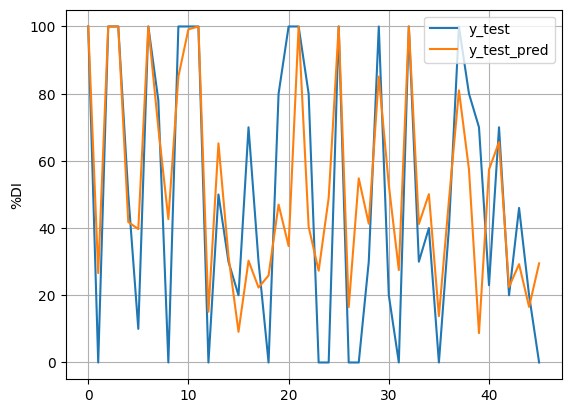

In [204]:
plt.plot(np.arange(len(y_pre)) ,y_test)
plt.plot(np.arange(len(y_pre)) , y_pre)
plt.legend(['y_test','y_test_pred'])
plt.ylabel("%DI")
plt.yticks(np.arange(0,101,20))
plt.grid()


plt.show()

In [205]:
y_test

array([100, 0, 100, 100, 50, 10, 100, 78, 0, 100, 100, 100, 0, 50, 30, 20,
       70, 30, 0, 80, 100, 100, 80, 0, 0, 100, 0, 0, 30, 100, 20, 0, 100,
       30, 40, 0, 40, 100, 80, 70, 23, 70, 20, 46, 20, 0], dtype=object)

In [206]:
import pickle

# save
with open('model2.pkl','wb') as f:
    pickle.dump(model,f)


In [207]:
# load
with open('model2.pkl', 'rb') as f:
    clf2 = pickle.load(f)

clf2.predict(X)

array([100.  , 100.  , 100.  ,  12.3 ,  48.5 , 100.  , 100.  ,  72.9 ,
        16.6 ,  11.1 , 100.  , 100.  , 100.  , 100.  ,   4.7 ,   9.2 ,
       100.  ,   8.8 ,   6.7 ,  98.64, 100.  ,  99.15,  99.15,  49.3 ,
         8.6 , 100.  , 100.  ,  15.1 ,  14.4 ,  57.6 , 100.  , 100.  ,
       100.  , 100.  ,   7.  ,  17.5 ,  16.5 ,  62.6 ,  50.7 ,  57.  ,
        28.7 ,  41.3 ,  85.1 ,  85.1 ,  85.1 ,   0.7 ,  10.  ,  15.7 ,
         0.  ,   3.13,  42.7 ,   5.6 ,   4.9 ,  42.66,  52.8 ,  58.3 ,
        36.9 ,   6.8 ,   7.7 ,  69.78,  91.83,  34.47,  30.43,  60.78,
        57.4 ,  77.  ,  36.2 ,  76.2 ,  44.6 ,  44.2 ,  21.82,  29.25,
        59.93,  39.9 ,  99.  , 100.  , 100.  ,  99.  ,  18.6 ,  29.5 ,
       100.  , 100.  , 100.  ,  68.3 , 100.  , 100.  , 100.  ,  50.1 ,
        28.6 ,  55.3 ,  95.16,  18.9 ,  19.8 ,  54.8 ,  64.5 ,  95.58,
        68.  ,  60.6 ,  50.9 ,  20.7 ,  19.6 ,  28.4 ,  16.5 ,  25.7 ,
        19.5 ,  25.9 ,  47.  ,  26.46,  20.9 ,  22.5 ,  11.6 ,  23.2 ,
      

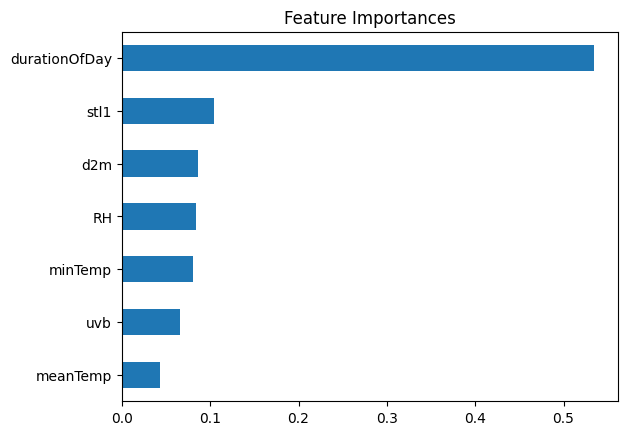

In [208]:
model_ranks = pd.Series(model.feature_importances_, index=X_train.columns, name="Importance").sort_values()
ax = model_ranks.plot(kind='barh')
plt.title("Feature Importances")
plt.show()